# DSC 630 Course Project

This is the second part of the Course Project. The initial importing and cleaning of the data was completed using **R**. I will be using Python to build the different models for this project.

First thing first, I need to import the cleaned data from **R** into Python. Fortunately, I saved the cleaded data as a .csv file.

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('C:/Users/yasam/OneDrive/Documents/Grad School/DSC630 Predictive Analytics/Final Project/hads2013n_ASCII/housing.csv')

In [3]:
housing.head(5)

,head_of_household_age,num_bedrooms,year_built,housing_burden,fair_market_rent,growth_adj_median_income,poverty_incom,num_units,other_costs,num_residents,num_rooms,owner_status,total_wage_income,monthly_utility_costs,vacancy_status,market_value,household_income,monthly_housing_costs
0,50,4,1980,0.047527,1100,55846,24218,1,58.333333,4,6,1,123000,245.333333,-6,130000,122961,487
1,53,4,1985,0.602703,1100,55846,15470,1,37.500000,2,7,1,28000,159.000000,-6,150000,27974,1405
2,67,3,1985,0.103911,949,55846,13964,1,70.666667,2,6,1,0,179.000000,-6,200000,32220,279
3,26,2,1980,0.094019,737,60991,15492,100,12.500000,2,4,2,96900,146.000000,-6,-6,96874,759
4,56,1,1985,0.556482,657,62066,12005,32,0.000000,1,3,2,15000,94.750000,-6,-6,14987,695


Ok, looks like the data imported without any issue. The variable I'm most interested in is the Market Value of the different houses, but I also want to see how the different variables interact with the Market Value variable. Looking at the correlation plot, the `market_value` is strongly possitively correlated with the `num_bedrooms`, `fair_market_rent`, `other_costs`, `total_wage_income`, `monthly_utility_costs`, `household_income`, and `monthly_housing_costs` variables. It is also strongly, negatively correlated with the `owner_status` varaible. This is a bit interesting. A value of 1 for the `owner_status` means that the property is owned by the person living there and a value of 2 means the person living at the house is renting the property. This means that owned houses usually have a higher `market_value` than rented houses. But that could be because the houses that are for rent don't have an associated `market_value` as they're not for sale.

Another interesting thing I noticed is that there is a vertical line within the `total_wage_income` at about $350,000 and that this line is spread along most of the `market_value` variable.

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
d = {'market_value': housing['market_value'].copy(),
    'fair_market_rent': housing['fair_market_rent'].copy()}
test = pd.DataFrame(data=d)

In [6]:
test.head(5)

,market_value,fair_market_rent
0,130000,1100
1,150000,1100
2,200000,949
3,-6,737
4,-6,657


[[2.34409885e+04 1.04839906e+03]
 [6.41707025e+05 1.70572812e+03]
 [2.52000000e+06 1.85954392e+03]
 [2.35422387e+05 1.28507455e+03]]


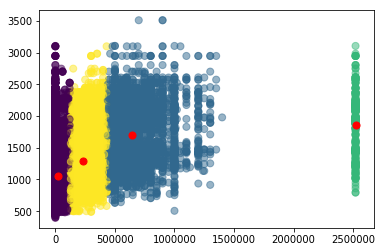

In [7]:
kmeans = KMeans(n_clusters=4).fit(test)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(test['market_value'], test['fair_market_rent'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:, 1], c='red', s=50)

[[8.39341085e+05 1.79751163e+03]
 [9.30467836e+04 1.07412495e+03]
 [2.52000000e+06 1.85954392e+03]
 [3.75203620e+05 1.51295475e+03]
 [6.09195790e+02 1.04467425e+03]
 [2.42971334e+05 1.29955430e+03]
 [5.78451001e+05 1.70810643e+03]
 [1.23292035e+06 1.86643363e+03]
 [1.89087302e+05 1.21327214e+03]
 [4.70987938e+05 1.61446238e+03]
 [1.00751701e+06 1.74646259e+03]
 [5.24171072e+04 1.02191687e+03]
 [3.01338762e+05 1.39818404e+03]
 [1.39620798e+05 1.12812072e+03]
 [6.95400000e+05 1.75857067e+03]]

market_value vs fair_market_rent


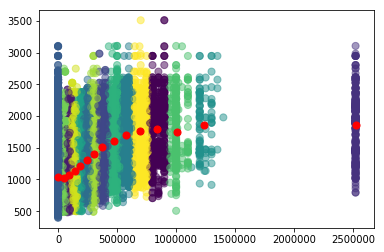

In [8]:
kmeans = KMeans(n_clusters=15).fit(test)
centroids = kmeans.cluster_centers_
print(centroids)
print('\nmarket_value vs fair_market_rent')
plt.scatter(test['market_value'], test['fair_market_rent'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:, 1], c='red', s=50)

Oh, that's cool! Look at how the centroids are related to each other! It's almost like a sine wave. I am surprised that it grouped things vertically, though. I wasn't expecting that. I was thinking that the clusters would be more sphirical. I honestly think this is one of the coolest things about Data Science, seeing these interesting results and wondering about why it is the way it is.

For now, let's take a look at some of the other variables and how they interplay with the `market_value`. I'll need to worry about finding the optimal value of k, but let's not worry about that for now. I will also need to worry about Feature Extraction, but let's worry about that later. Let's explore the data a bit more.

[[2.72494060e+04 2.30321687e+00]
 [6.78287182e+05 3.68398516e+00]
 [2.50581594e+05 3.26283553e+00]
 [2.52000000e+06 4.09121622e+00]]


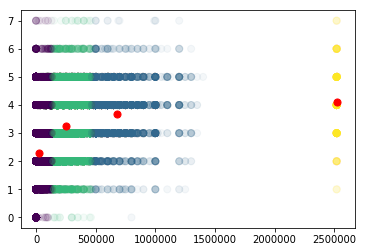

In [9]:
d = {'market_value': housing['market_value'],
    'num_bedrooms': housing['num_bedrooms']}
test = pd.DataFrame(data=d)

kmeans = KMeans(n_clusters=4).fit(test)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(test['market_value'], test['num_bedrooms'],
            c=kmeans.labels_.astype(float), s=50, alpha=.05)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)

[[6.09195790e+02 2.04214083e+00]
 [3.52024774e+05 3.42496427e+00]
 [2.52000000e+06 4.09121622e+00]
 [1.39620798e+05 3.03924491e+00]
 [9.59306931e+05 3.83663366e+00]
 [5.11595912e+05 3.58333333e+00]
 [2.40979580e+05 3.26546315e+00]
 [6.36746104e+05 3.69569203e+00]
 [8.91589694e+04 2.91800357e+00]
 [1.89087302e+05 3.18880535e+00]
 [1.20000000e+06 4.03333333e+00]
 [2.94641017e+05 3.33631055e+00]
 [4.19578844e+05 3.49118511e+00]
 [7.90170648e+05 3.68600683e+00]
 [4.65523871e+04 2.69464915e+00]]


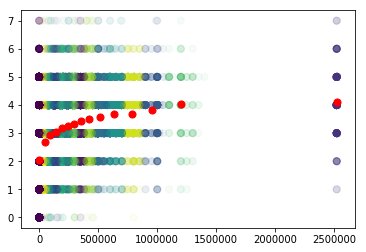

In [10]:
kmeans = KMeans(n_clusters=15).fit(test)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(test['market_value'], test['num_bedrooms'],
            c=kmeans.labels_.astype(float), s=50, alpha=.05)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)

[[2.72494060e+04 3.46140761e+01]
 [6.78287182e+05 1.99168379e+02]
 [2.50581594e+05 1.11378759e+02]
 [2.52000000e+06 4.27197635e+02]]


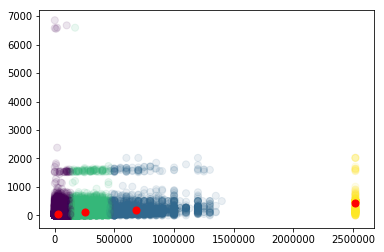

In [11]:
d = {'market_value': housing['market_value'],
    'other_costs': housing['other_costs']}
test = pd.DataFrame(data=d)

kmeans = KMeans(n_clusters=4).fit(test)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(test['market_value'], test['other_costs'],
            c=kmeans.labels_.astype(float), s=50, alpha=.1)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)

[[  31430.94000558   30649.56188443]
 [ 258139.22664665   71845.25603642]
 [2520000.00000001  131051.33783784]
 [ 674617.97752805  118251.475     ]]


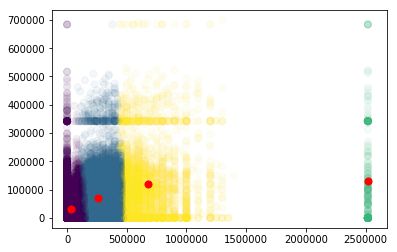

In [12]:
d = {'market_value': housing['market_value'],
    'total_wage_income': housing['total_wage_income']}
test = pd.DataFrame(data=d)

kmeans = KMeans(n_clusters=4).fit(test)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(test['market_value'], test['total_wage_income'],
           c=kmeans.labels_.astype(float), s=50, alpha=.05)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)

[[8.51785938e+04 2.50348059e+04]
 [2.52000000e+06 1.31051338e+05]
 [7.77005917e+05 6.91560994e+04]
 [3.05068686e+05 1.38482193e+05]
 [2.38578190e+03 1.35585358e+04]
 [1.65029456e+05 1.88132262e+04]
 [5.54925115e+05 7.41517575e+04]
 [8.16887160e+05 3.78536794e+05]
 [4.51731066e+05 3.14379445e+05]
 [1.62993083e+05 1.04390052e+05]
 [1.07697479e+06 8.95753361e+04]
 [3.96804994e+05 4.61720213e+04]
 [2.66333982e+05 2.81987079e+04]
 [1.09233255e+05 3.52638296e+05]
 [5.72752800e+03 8.66150070e+04]]

market_value vs total_wage_income


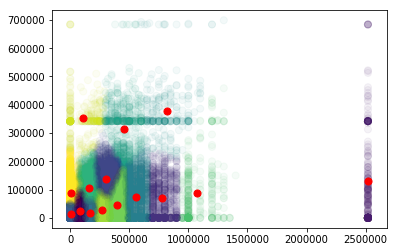

In [13]:
kmeans = KMeans(n_clusters=15).fit(test)
centroids = kmeans.cluster_centers_
print(centroids)
print('\nmarket_value vs total_wage_income')
plt.scatter(test['market_value'], test['total_wage_income'],
           c=kmeans.labels_.astype(float), s=50, alpha=.05)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)

Ah-ha!! Finally, it's not all just vertical slices of the data! I was getting worried I was doing something wrong. Still, the way the groups are clustered is interesting. There are so many clusters in the bottom left corner, where the houses are lower priced, and people make less. Having said that, it's good to keep in mind the scale of both axis. The x-axis goes up to $2,500,000 market price for a house and the y-axis goes up to `$700,000` total wage income. Still, there are more houses that are under a million and most of the clusters have centroids making under `$100,000` total wage income (9 of 15). Geez, what do I need to do to get into the 6 higher clusters?

[[2.56350799e+05 2.50699935e+02]
 [2.52000000e+06 4.01094032e+02]
 [2.99793239e+04 1.47148503e+02]
 [6.78287182e+05 3.13712413e+02]]


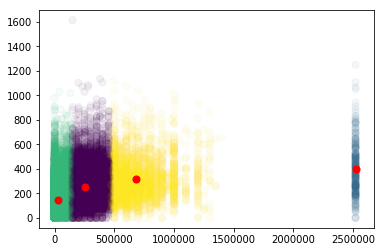

In [14]:
d = {'market_value': housing['market_value'],
    'monthly_utility_costs': housing['monthly_utility_costs']}
test = pd.DataFrame(data=d)

kmeans = KMeans(n_clusters=4).fit(test)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(test['market_value'], test['monthly_utility_costs'],
           c=kmeans.labels_.astype(float), s=50, alpha=.05)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)

[[5.10898966e+05 3.00521215e+02]
 [4.65523871e+04 2.00043068e+02]
 [2.52000000e+06 4.01094032e+02]
 [2.40979580e+05 2.46350252e+02]
 [9.58431373e+05 3.49225694e+02]
 [6.09195790e+02 1.16185491e+02]
 [1.39620798e+05 2.20872551e+02]
 [3.52024774e+05 2.78743330e+02]
 [7.64751861e+05 3.15387200e+02]
 [6.19512472e+05 3.07746126e+02]
 [2.94641017e+05 2.61095299e+02]
 [1.89087302e+05 2.36362991e+02]
 [8.91589694e+04 2.09310012e+02]
 [1.20000000e+06 3.53741111e+02]
 [4.19578844e+05 2.84709476e+02]]


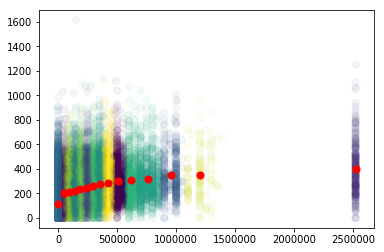

In [15]:
kmeans = KMeans(n_clusters=15).fit(test)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(test['market_value'], test['monthly_utility_costs'],
           c=kmeans.labels_.astype(float), s=50, alpha=.05)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)

[[  31528.68109935   41305.50476951]
 [ 671713.88888885  170448.09111112]
 [ 257639.68163167   96486.1900965 ]
 [2520000.00000001  235178.95608108]]


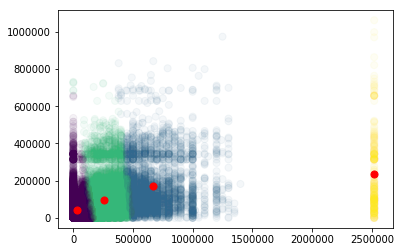

In [16]:
d = {'market_value': housing['market_value'],
    'household_income': housing['household_income']}
test = pd.DataFrame(data=d)

kmeans = KMeans(n_clusters=4).fit(test)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(test['market_value'], test['household_income'],
           c=kmeans.labels_.astype(float), s=50, alpha=.05)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)

[[2.21165298e+03 2.14803086e+04]
 [5.53407494e+05 1.08615292e+05]
 [2.52000000e+06 2.35178956e+05]
 [2.67378418e+05 6.28468238e+04]
 [4.30472576e+03 9.35490528e+04]
 [1.57490296e+05 4.41087343e+04]
 [8.15040000e+05 4.01895739e+05]
 [4.36297814e+05 3.72602650e+05]
 [3.96889932e+05 6.72381753e+04]
 [7.75870130e+05 1.03819288e+05]
 [3.39774194e+05 1.63962540e+05]
 [1.75168818e+05 1.25230377e+05]
 [1.08056886e+06 1.41517512e+05]
 [1.15472380e+05 3.60147412e+05]
 [8.05405763e+04 4.29759633e+04]]


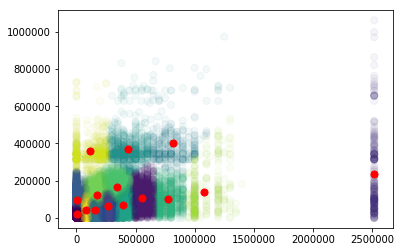

In [17]:
kmeans = KMeans(n_clusters=15).fit(test)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(test['market_value'], test['household_income'],
           c=kmeans.labels_.astype(float), s=50, alpha=.05)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)

Looks like if there is a vertical split in the data, it will deviate away from the vertical slices of the data. Interesting.

[[3.55114107e+04 8.42374423e+02]
 [2.70991771e+05 1.49680709e+03]
 [2.52000000e+06 4.48894595e+03]
 [6.88872858e+05 2.72305500e+03]]


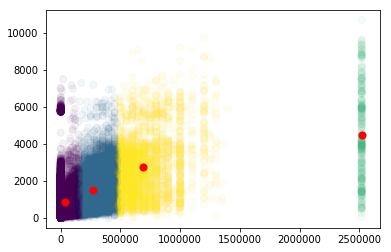

In [18]:
d = {'market_value': housing['market_value'],
    'monthly_housing_costs': housing['monthly_housing_costs']}
test = pd.DataFrame(data=d)

kmeans = KMeans(n_clusters=4).fit(test)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(test['market_value'], test['monthly_housing_costs'],
           c=kmeans.labels_.astype(float), s=50, alpha=.05)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)

[[6.09195790e+02 8.61240378e+02]
 [4.70987938e+05 2.15504078e+03]
 [2.52000000e+06 4.48894595e+03]
 [1.89087302e+05 1.18874624e+03]
 [8.39341085e+05 3.10713566e+03]
 [8.91589694e+04 7.73185221e+02]
 [5.78451001e+05 2.56153952e+03]
 [1.23292035e+06 4.43167257e+03]
 [3.01338762e+05 1.63304691e+03]
 [1.39620798e+05 9.83187614e+02]
 [3.75203620e+05 1.84204699e+03]
 [1.00751701e+06 3.30956803e+03]
 [2.42971334e+05 1.41462155e+03]
 [6.95400000e+05 2.68711200e+03]
 [4.65523871e+04 6.15380968e+02]]


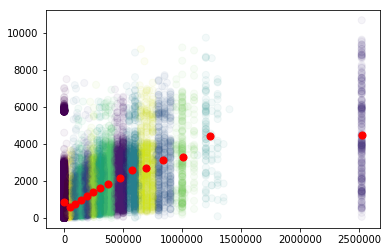

In [19]:
kmeans = KMeans(n_clusters=15).fit(test)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(test['market_value'], test['monthly_housing_costs'],
           c=kmeans.labels_.astype(float), s=50, alpha=.05)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)

Hmmm, maybe not. This set also has a vertical split, if not as strong.

[[2.72494060e+04 1.66981157e+00]
 [6.78287182e+05 1.00000000e+00]
 [2.50581594e+05 1.00000000e+00]
 [2.52000000e+06 1.00000000e+00]]


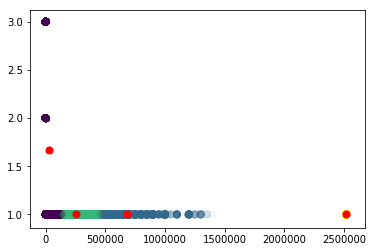

In [20]:
d = {'a': housing['market_value'],
    'b': housing['owner_status']}
test = pd.DataFrame(data=d)

kmeans = KMeans(n_clusters=4).fit(test)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(test['a'], test['b'],
           c=kmeans.labels_.astype(float), s=50, alpha=.05)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)

Psh, I should have expected this one. Oh, well.

Now what if I try to do some Feature Extraction? Let's try PCA.

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
# Standardize the data
features = StandardScaler().fit_transform(housing)

In [23]:
# Let's keep 95% of the variaence
pca = PCA(n_components=0.95, whiten=True)

features_pca = pca.fit_transform(features)

print('Original number of features:', features.shape[1])
print('Reduced number of features:', features_pca.shape[1])

Original number of features: 18
Reduced number of features: 13


In [24]:
kmeans = KMeans(n_clusters=4).fit(features_pca)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.87703799 -0.23513436  0.45718271 -0.03467229 -0.24462255  0.11427477
  -0.20626598  0.29079466  0.20871741 -0.09876656  0.43984535  0.37548301
   0.23985777]
 [ 0.24377269  0.70880916 -0.37064052  0.05734921 -0.1523589   0.03563235
   0.02696319  0.04349232 -0.06216624  0.1325167  -0.28801014 -0.1895969
  -0.14174885]
 [ 0.83591892 -1.13792244 -0.10289203 -0.08999278  0.39341924 -0.12646977
   0.24903336 -0.16050111 -0.2998504  -0.21811236  0.0690506  -0.11464746
  -0.05519274]
 [-1.24290993  0.51956401  2.24659223  0.24592968  2.58103524 -1.06439523
  -0.20800014 -3.41737906  1.44403423  0.94420054 -1.0414167  -0.24145004
   0.08800011]]


Hmmmm, this is really cool! The only downside is I don't know which entry represents which variable. I wonder what the best k value is. Let's see if I can figure out what it is.

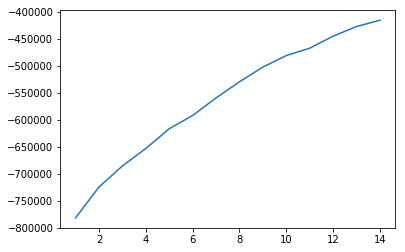

In [25]:
num_clusters = range(1,15)
kmeans = [KMeans(n_clusters=i) for i in num_clusters]
kmeans
score = [kmeans[i].fit(features_pca).score(features_pca) for i in range(len(kmeans))]
score
plt.plot(num_clusters, score)
plt.show()

Well, dang it. That's what I was afraid of using real data. There doesn't seem to be a "best" k within this range. Let's look at a few more, just in case.

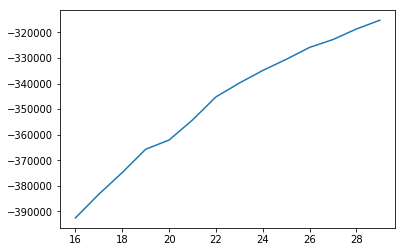

In [26]:
num_clusters = range(16,30)
kmeans = [KMeans(n_clusters=i) for i in num_clusters]
kmeans
score = [kmeans[i].fit(features_pca).score(features_pca) for i in range(len(kmeans))]
score
plt.plot(num_clusters, score)
plt.show()

Hmmm, there's an interesting little fluctuation right at 20, 21 clusters. Still, it's not the classic "elbow" curve, so I guess we can choose our value for k.

Looking at this, what if I selected the wrong variables because of my own bias? Let's try to identify the most important variables... Wait, I did all of the cleaning in **R**, didn't I? Dang, I'd have to go back to the drawing board and re-clean everything if I were to do this. Since I've been crunched for time recently, let's run with what I have for now.

In [48]:
kmeans = KMeans(n_clusters=15).fit(housing)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 5.98781028e+01  3.04158103e+00  1.96944759e+03  3.05810976e+00
   1.16289091e+03  6.60373905e+04  1.59725129e+04  3.18150198e+00
   9.30279842e+01  2.22466403e+00  6.27288538e+00  1.00000000e+00
   1.99294206e+04  2.19270000e+02 -6.00000000e+00  1.68194466e+05
   4.12339946e+04  9.49827352e+02]
 [ 5.85574324e+01  4.09121622e+00  1.96464865e+03  1.84461419e+01
   1.85954392e+03  7.68482196e+04  1.79791858e+04  7.66216216e+00
   4.27197635e+02  2.71959459e+00  8.67229730e+00  1.00000000e+00
   1.31051338e+05  4.01094032e+02 -6.00000000e+00  2.52000000e+06
   2.35178956e+05  4.48894595e+03]
 [ 5.00528053e+01  4.07920792e+00  1.97140594e+03  1.21411098e-01
   1.72288449e+03  7.76856601e+04  2.11920825e+04  8.53135314e+00
   2.73996150e+02  3.45214521e+00  8.81848185e+00  1.00000000e+00
   3.48327752e+05  3.73709571e+02 -6.00000000e+00  8.51947195e+05
   4.14105017e+05  3.93877558e+03]
 [ 5.97725400e+01  3.38901602e+00  1.96735789e+03  2.63373537e+00
   1.58927185e+03  7.55193190e+04  1.

In [49]:
housing.head(5)

,head_of_household_age,num_bedrooms,year_built,housing_burden,fair_market_rent,growth_adj_median_income,poverty_incom,num_units,other_costs,num_residents,num_rooms,owner_status,total_wage_income,monthly_utility_costs,vacancy_status,market_value,household_income,monthly_housing_costs
0,50,4,1980,0.047527,1100,55846,24218,1,58.333333,4,6,1,123000,245.333333,-6,130000,122961,487
1,53,4,1985,0.602703,1100,55846,15470,1,37.500000,2,7,1,28000,159.000000,-6,150000,27974,1405
2,67,3,1985,0.103911,949,55846,13964,1,70.666667,2,6,1,0,179.000000,-6,200000,32220,279
3,26,2,1980,0.094019,737,60991,15492,100,12.500000,2,4,2,96900,146.000000,-6,-6,96874,759
4,56,1,1985,0.556482,657,62066,12005,32,0.000000,1,3,2,15000,94.750000,-6,-6,14987,695


In [50]:
cluster_nums = kmeans.predict(housing)
cluster_nums

array([9, 0, 0, ..., 4, 8, 4])

In [51]:
import numpy as np
entry = np.array([29, 3, 2000, 0.1, 1100, 35000, 18000, 1, 100, 1, 4, 1, 39000, 150, 0, 150000, 39000, 800]).reshape(1,-1)
kmeans.predict(entry)

array([0])

In [52]:
housing_model = housing.copy()

In [53]:
housing_model['cluster'] = cluster_nums
housing_model.head(5)

,head_of_household_age,num_bedrooms,year_built,housing_burden,fair_market_rent,growth_adj_median_income,poverty_incom,num_units,other_costs,num_residents,num_rooms,owner_status,total_wage_income,monthly_utility_costs,vacancy_status,market_value,household_income,monthly_housing_costs,cluster
0,50,4,1980,0.047527,1100,55846,24218,1,58.333333,4,6,1,123000,245.333333,-6,130000,122961,487,9
1,53,4,1985,0.602703,1100,55846,15470,1,37.500000,2,7,1,28000,159.000000,-6,150000,27974,1405,0
2,67,3,1985,0.103911,949,55846,13964,1,70.666667,2,6,1,0,179.000000,-6,200000,32220,279,0
3,26,2,1980,0.094019,737,60991,15492,100,12.500000,2,4,2,96900,146.000000,-6,-6,96874,759,8
4,56,1,1985,0.556482,657,62066,12005,32,0.000000,1,3,2,15000,94.750000,-6,-6,14987,695,4


In [54]:
test = housing_model[housing_model['cluster'] == 0]
print('The range of housing costs are from', min(test['market_value']), 'to', max(test['market_value']))

The range of housing costs are from 130000 to 230000


Well, this is both awesome and completely depressing. According to this model, the cluster that my personal data fits into have houses that range from 70,000 to 220,000 dollars. The housing market where I'm currently at doesn't have a whole lot of houses that are in that price range that are in a neighborhood that I want to be in. This does, however, give me a great idea for an application that could be made. The application could take in a user's details and let them know what the house costs for others in similar situations are. I would want to work on this a lot more before I get to that point. For one, I would need to actually develop the application. But this is a really cool thing!

As for my initial question, my conclusion is that as of right now, I can't comfortably afford a house unless I can find one for under 220,000.